<b>Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import re

<b>Load Data</b>

In [2]:
df = pd.read_csv('Final data.csv')

In [4]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [5]:
df.head()

Name  Nationality  \
0  A Singular Tub of FazeBerry ® GFuel ® Energy F...    "English"   
1                              Aleksandar Stojakovic    "Serbian"   
2                                  Alessio Calvatore    "Italian"   
3                                 Alfredo Puttanesca   "Canadian"   
4                                   Andreas Aadnevik  "Norwegian"   

             Club     Position  Apps  Minutes Played  Distance Run (km)  \
0  "Athênai F.C."   "WB/M (R)"   1.0              90               13.2   
1  "Inter London"  "D (C). DM"   1.0              90               11.4   
2    "Cairo City"  "DM. M (C)"   1.0              90               10.9   
3    "Cairo City"   "WB/M (L)"   1.0              90               13.0   
4  "Athênai F.C."     "ST (C)"   1.0              90               12.8   

   Average Rating  Player of the Match  Goals  ...  Ref  TRO   Sta   Str  \
0             6.9                    0      1  ...  1.0  1.0  20.0  10.0   
1             7.9                    0      1  ...  1.0  1.0  20.0  10.0   
2             7.2                    0      0  ...  1.0  1.0  20.0  10.0   
3             7.5                    0      1  ...  2.0  3.0  20.0  10.0   
4             6.1                    0      0  ...  1.0  1.0  20.0  10.0   

    Tck   Tea   Tec  Thr   Vis   Wor  
0   8.0   9.0   9.0  1.0   9.0  10.0  
1  13.0  11.0   5.0  1.0   5.0  12.0  
2  10.0  12.0  13.0  1.0  11.0  12.0  
3   9.0   7.0  10.0  2.0   7.0   8.0  
4   5.0   8.0   5.0  1.0   5.0   8.0  

[5 rows x 93 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       9695 non-null   object 
 1   Nationality                9695 non-null   object 
 2   Club                       9695 non-null   object 
 3   Position                   9695 non-null   object 
 4   Apps                       9695 non-null   float64
 5   Minutes Played             9695 non-null   int64  
 6   Distance Run (km)          9695 non-null   float64
 7   Average Rating             9695 non-null   float64
 8   Player of the Match        9695 non-null   int64  
 9   Goals                      9695 non-null   int64  
 10  Assists                    9695 non-null   int64  
 11  xG                         9695 non-null   float64
 12  Shots on Target            9695 non-null   int64  
 13  Shots                      9695 non-null   int64

In [7]:
df.isnull().sum()

Name             0
Nationality      0
Club             0
Position         0
Apps             0
              ... 
Tea            280
Tec            280
Thr            280
Vis            280
Wor            280
Length: 93, dtype: int64

<b>EDA</b>

In [11]:
df.nunique() # Unique values

Name           266
Nationality     56
Club            15
Position        85
Apps             3
              ... 
Tea             11
Tec             13
Thr             11
Vis             15
Wor             13
Length: 93, dtype: int64

------------------------------

In [35]:
df.describe(include='object')

Name Nationality          Club Position Result  \
count                 9695        9695          9695     9695   9582   
unique                 266          56            15       85     54   
top     Connor Azpilicueta  "American"  "Cairo City"     "GK"  "2-1"   
freq                    91        1798          1005      860    787   

              Opponent Matchday  
count             9582     9582  
unique              15       34  
top     "Hollywood FC"      "5"  
freq               994      560

----------------------------------

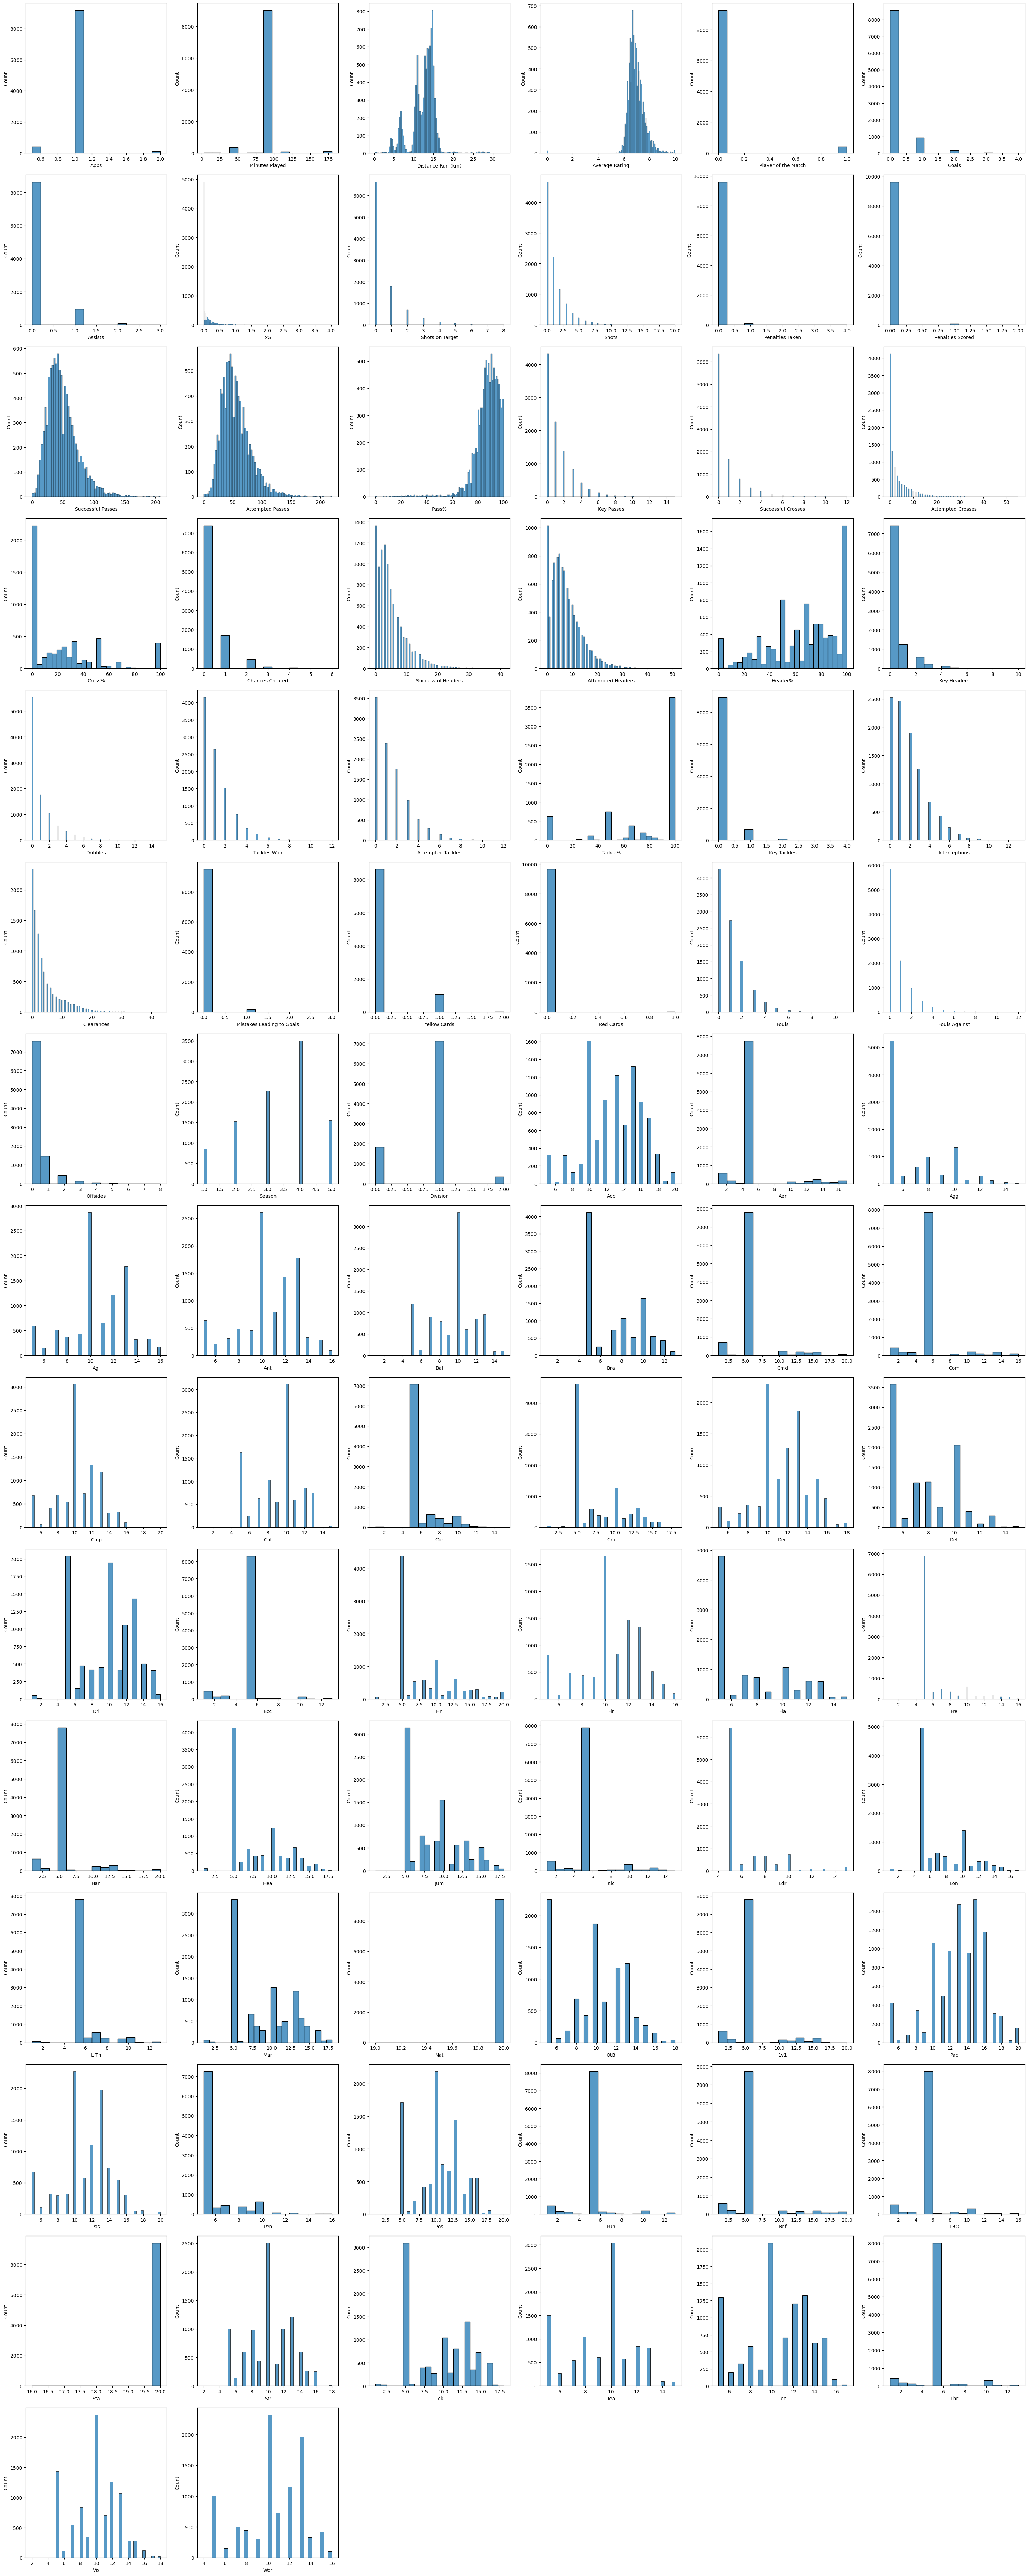

In [23]:
cols = 6
rows = 15
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

In [34]:
len(list(num_cols)) # out of 93 only 86 are numeric features

86

--------------------------------------------

------------------------------------------

C:\Users\Dell\AppData\Local\Temp\ipykernel_11348\4008844654.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[columns].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


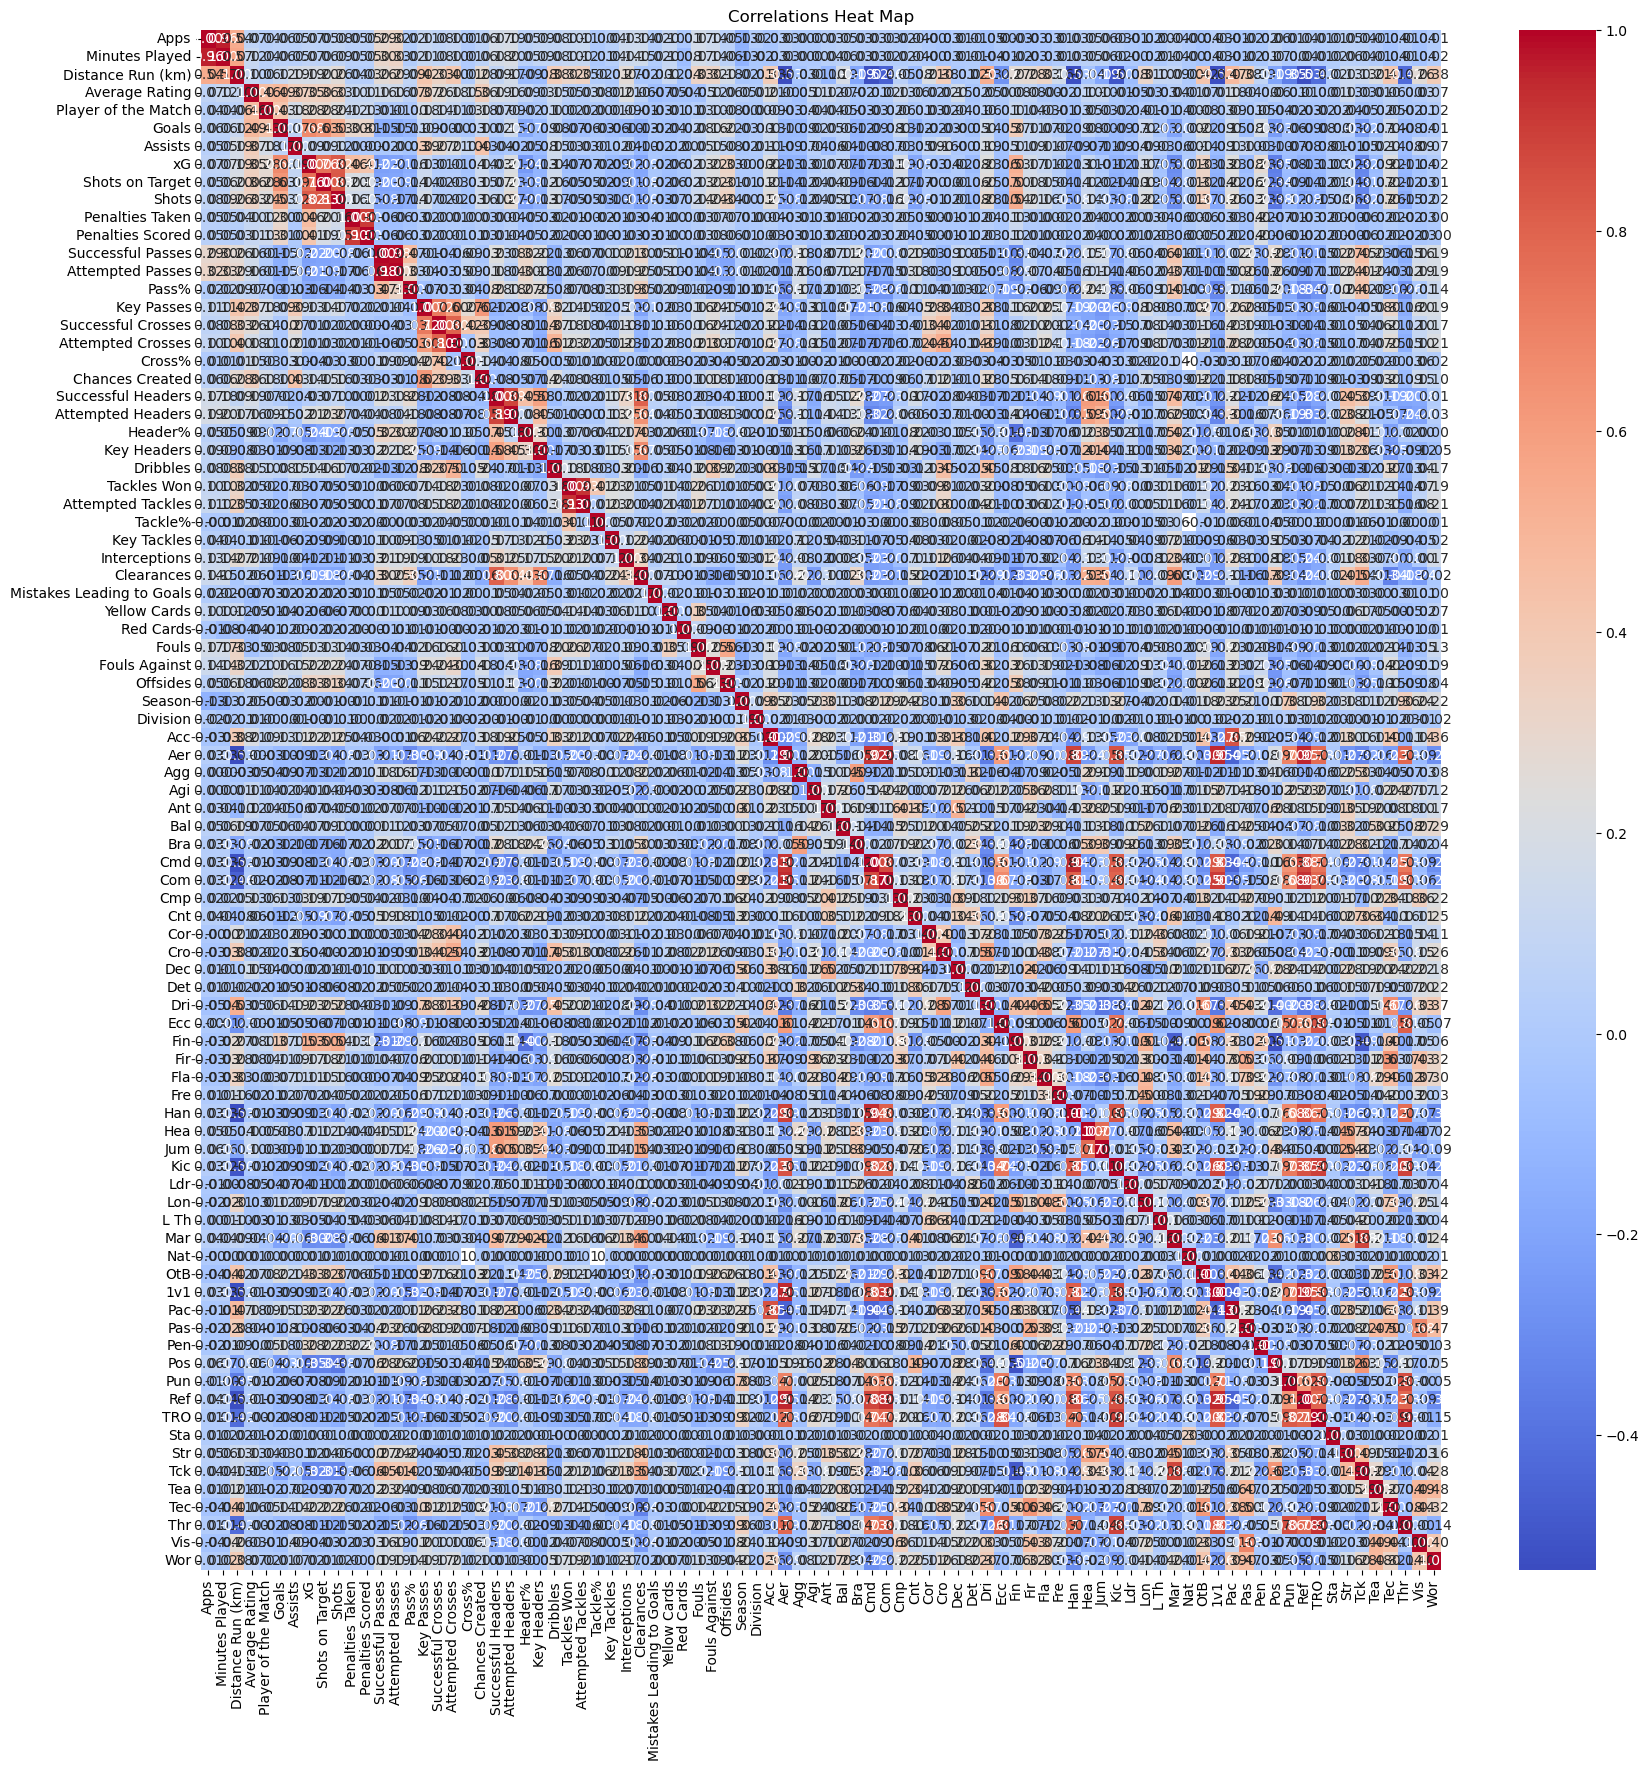

In [8]:
columns = df.columns.tolist()[1:]
plt.figure(figsize=(20,20))
sns.heatmap(df[columns].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Correlations Heat Map')
plt.show()